In [1]:
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree

In [2]:
df= pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/drug200.csv'
                , delimiter=","
)

In [3]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [4]:
df.shape

(200, 6)

In [5]:
df.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [6]:
x=df[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values

In [7]:
x[0:5]

array([[23, 'F', 'HIGH', 'HIGH', 25.355],
       [47, 'M', 'LOW', 'HIGH', 13.093],
       [47, 'M', 'LOW', 'HIGH', 10.113999999999999],
       [28, 'F', 'NORMAL', 'HIGH', 7.797999999999999],
       [61, 'F', 'LOW', 'HIGH', 18.043]], dtype=object)

In [8]:
sex=pd.get_dummies(df['Sex'])

In [9]:
sex.head()

,F,M
0,1,0
1,0,1
2,0,1
3,1,0
4,1,0


In [10]:
Bp=pd.get_dummies(df['BP'])

In [11]:
Bp.head()

,HIGH,LOW,NORMAL
0,1,0,0
1,0,1,0
2,0,1,0
3,0,0,1
4,0,1,0


In [12]:
chol=pd.get_dummies(df['Cholesterol']).rename(columns={'HIGH':'hight','NORMAL':'norma'})

In [13]:
chol.head()

,hight,norma
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


## a new feature matrix

In [14]:
nx=pd.concat([df,sex,Bp,chol], axis=1)

In [15]:
nx.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug,F,M,HIGH,LOW,NORMAL,hight,norma
0,23,F,HIGH,HIGH,25.355,drugY,1,0,1,0,0,1,0
1,47,M,LOW,HIGH,13.093,drugC,0,1,0,1,0,1,0
2,47,M,LOW,HIGH,10.114,drugC,0,1,0,1,0,1,0
3,28,F,NORMAL,HIGH,7.798,drugX,1,0,0,0,1,1,0
4,61,F,LOW,HIGH,18.043,drugY,1,0,0,1,0,1,0


In [16]:
nx=nx.drop(['Sex','BP','Cholesterol','Drug'],axis=1)

In [17]:
nx.head()

,Age,Na_to_K,F,M,HIGH,LOW,NORMAL,hight,norma
0,23,25.355,1,0,1,0,0,1,0
1,47,13.093,0,1,0,1,0,1,0
2,47,10.114,0,1,0,1,0,1,0
3,28,7.798,1,0,0,0,1,1,0
4,61,18.043,1,0,0,1,0,1,0


In [18]:
nx=nx.values

In [19]:
y=df[['Drug']]

In [20]:
y.head()

,Drug
0,drugY
1,drugC
2,drugC
3,drugX
4,drugY


In [21]:
from sklearn.model_selection import train_test_split

In [22]:
x_train,x_test,y_train,y_test=train_test_split(nx,y,test_size=0.3,random_state=3)

In [23]:
print('size of x_trainset:',x_train.shape,'and the size of y_trainset:',y_train.shape)

size of x_trainset: (140, 9) and the size of y_trainset: (140, 1)


In [24]:
print('size of y_trainset: {}'.format(y_train.shape))

size of y_trainset: (140, 1)


In [25]:
dtree=DecisionTreeClassifier(criterion='entropy',max_depth=4)
dtree

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [26]:
dtree.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [27]:
predtree=dtree.predict(x_test)

In [28]:
predtree[0:6]

array(['drugY', 'drugX', 'drugX', 'drugX', 'drugX', 'drugC'], dtype=object)

In [29]:
print(y_test[0:6])

      Drug
40   drugY
51   drugX
139  drugX
197  drugX
170  drugX
82   drugC


In [30]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predtree))

DecisionTrees's Accuracy:  0.9833333333333333


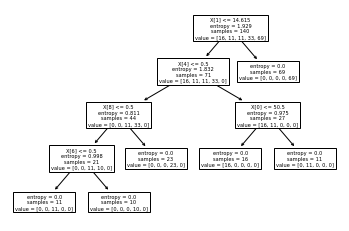

In [31]:
tree.plot_tree(dtree)
plt.show()